In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
Airbnb_data = pd.read_csv('C:/Users/Mohammad/DataScienceCapstone/data1/Airbnb_cleaned3.csv')

In [11]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2257 non-null   int64  
 1   neighbourhood_x                   2257 non-null   int64  
 2   price_x                           2257 non-null   int64  
 3   minimum_nights                    2257 non-null   int64  
 4   number_of_reviews_x               2257 non-null   int64  
 5   reviews_per_month_x               2257 non-null   float64
 6   calculated_host_listings_count_x  2257 non-null   int64  
 7   availability_365_x                2257 non-null   int64  
 8   diff_x                            2257 non-null   float64
 9   neighbourhood_y                   2257 non-null   int64  
 10  price_y                           2257 non-null   int64  
 11  number_of_reviews_y               2257 non-null   int64  
 12  review

In [4]:

Airbnb_data1=Airbnb_data[['neighbourhood', 'minimum_nights', 'latitude', 'longitude',  'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price', 'diff']]
Airbnb_data1.head()

,neighbourhood,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price,diff
0,28801,30,35.60670,-82.55563,30,89,0.79,82,493.0
1,28806,1,35.57864,-82.59578,1,279,2.44,90,121.0
2,28806,1,35.57864,-82.59578,1,290,2.78,30,156.0
3,28801,30,35.61442,-82.54127,30,58,0.51,125,1996.0
4,28804,30,35.61856,-82.55276,30,56,0.50,134,193.0


In [5]:
#Code task 1#
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = Airbnb_data1.set_index('neighbourhood')
#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index
state_summary_index

#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price,diff
neighbourhood,,,,,,,,
28801,30,35.60670,-82.55563,30,89,0.79,82,493.0
28806,1,35.57864,-82.59578,1,279,2.44,90,121.0
28806,1,35.57864,-82.59578,1,290,2.78,30,156.0
28801,30,35.61442,-82.54127,30,58,0.51,125,1996.0
28804,30,35.61856,-82.55276,30,56,0.50,134,193.0


In [6]:
state_summary_scale = scale(state_summary_scale)

In [7]:
#Code task 2#
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,minimum_nights,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,price,diff
0,2.492711,0.615720,0.019655,2.492711,0.090798,-0.972087,-0.564879,1.740126
1,-0.374342,0.024202,-0.850685,-0.374342,1.959072,-0.221486,-0.512480,-0.370668
2,-0.374342,0.024202,-0.850685,-0.374342,2.067235,-0.066817,-0.905470,-0.172072
3,2.492711,0.778462,0.330940,2.492711,-0.214026,-1.099462,-0.283236,10.268416
4,2.492711,0.865735,0.081868,2.492711,-0.233692,-1.104011,-0.224287,0.037872


In [8]:
#Code task 3#
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

minimum_nights      -1.722272e-15
latitude            -7.842427e-14
longitude           -4.981136e-14
minimum_nights      -1.722272e-15
number_of_reviews   -7.191609e-17
reviews_per_month    2.593033e-17
price               -3.105132e-16
diff                -1.748586e-15
dtype: float64

In [9]:
#Code task 4#
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

minimum_nights       1.000222
latitude             1.000222
longitude            1.000222
minimum_nights       1.000222
number_of_reviews    1.000222
reviews_per_month    1.000222
price                1.000222
diff                 1.000222
dtype: float64

In [10]:
#Code task 5#
#Repeat the previous call to `std()` but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

minimum_nights       1.0
latitude             1.0
longitude            1.0
minimum_nights       1.0
number_of_reviews    1.0
reviews_per_month    1.0
price                1.0
diff                 1.0
dtype: float64

In [11]:
state_pca = PCA().fit(state_summary_scale)

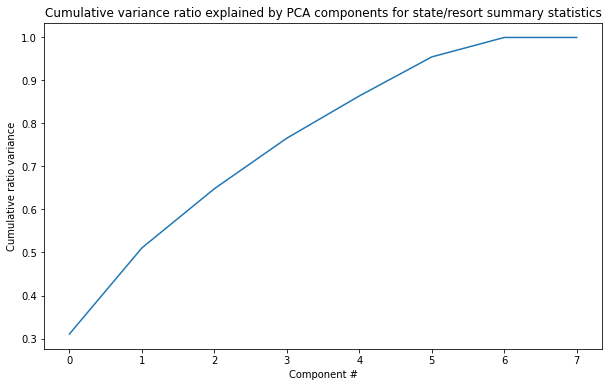

In [12]:
#Code task 6#
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [13]:
#Code task 7#
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [14]:
state_pca_x.shape
state_pca_x

array([[ 3.84587021e+00,  1.41001708e+00,  1.51594627e-02, ...,
         2.61646173e-01, -3.39557808e-01, -7.44937235e-16],
       [-1.03466724e+00,  1.14855340e+00, -3.26072192e-01, ...,
         4.19124453e-01, -1.57903347e+00,  9.40268088e-17],
       [-1.04020300e+00,  1.46720215e+00, -2.69865068e-01, ...,
         4.79808353e-01, -1.49513730e+00,  5.46710359e-17],
       ...,
       [-1.95522479e-01, -5.91734696e-01, -5.11847742e-01, ...,
        -1.59194940e-01,  5.22470282e-01,  6.85162324e-17],
       [-2.01212192e-01,  1.64790445e-01, -2.07586634e+00, ...,
        -2.14505999e-01,  4.48513433e-01, -1.99363309e-16],
       [-8.55355502e-02, -7.36913271e-01, -4.18864937e-01, ...,
        -5.47622509e-02,  5.28424430e-01,  2.77555756e-17]])

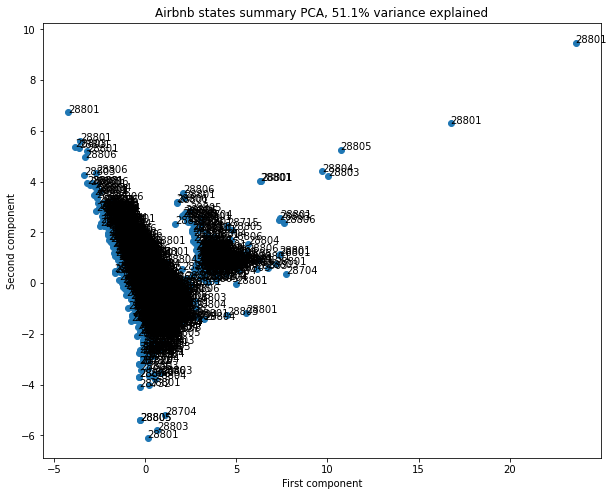

In [15]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Airbnb states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

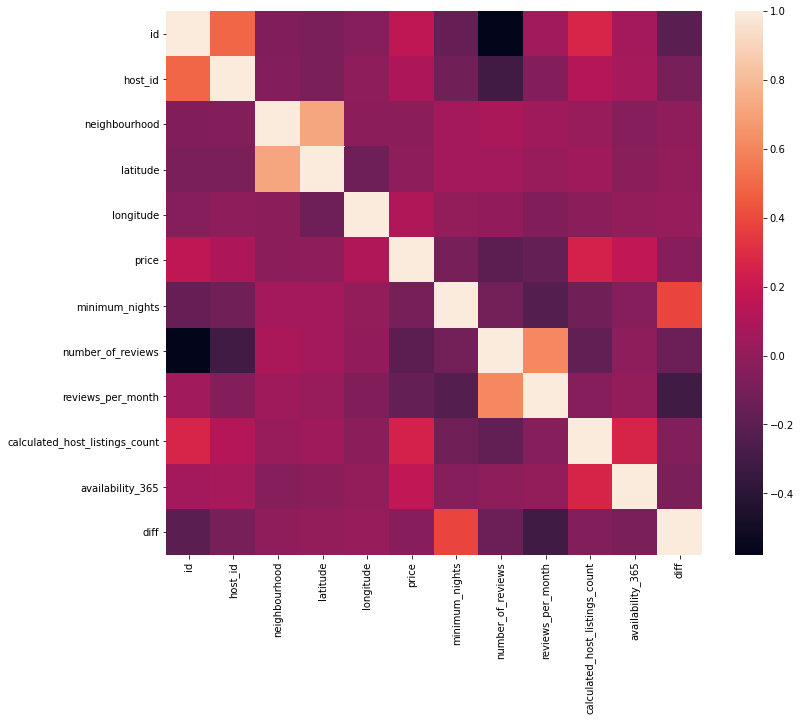

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(Airbnb_data.corr());

In [17]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=Airbnb_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [18]:
features = [ item for item in Airbnb_data.columns if item not in ['price', 'name','host_name','last_review']]

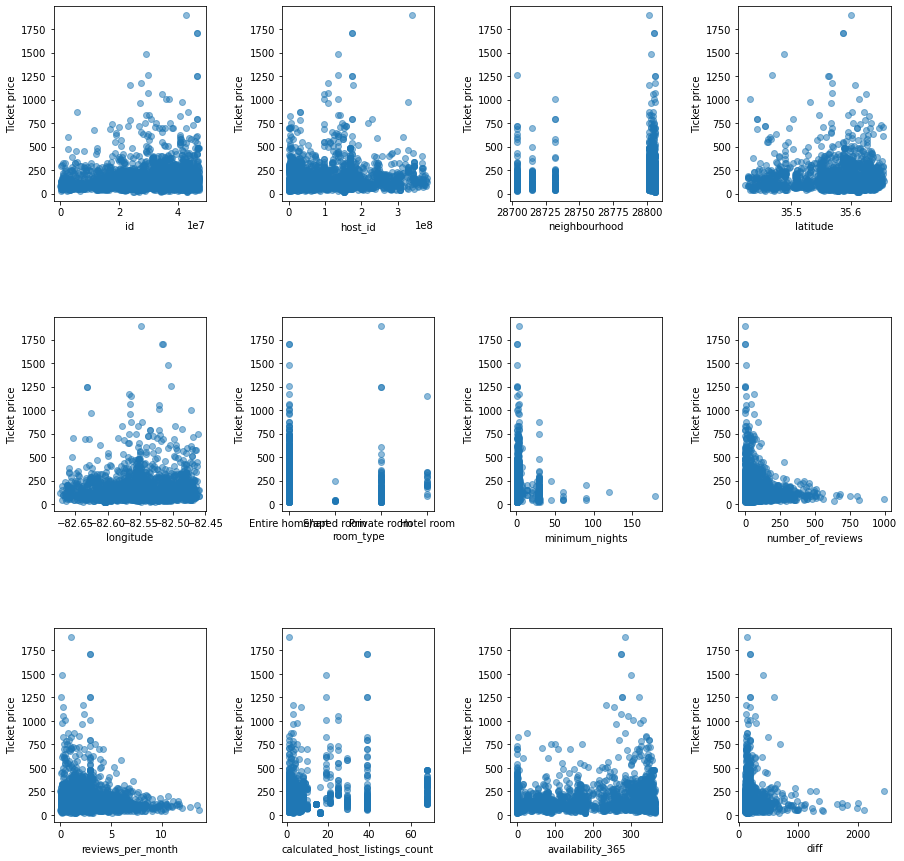

In [19]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [20]:
datapath = 'C:/Users/Mohammad/DataScienceCapstone/data'
datapath_Airbnbdata = os.path.join(datapath, 'Airbnb_step3_a_features.csv')
if not os.path.exists(datapath_Airbnbdata):
    Airbnb_data.to_csv(datapath_Airbnbdata, index=False)

In [21]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

NameError: name 'df' is not defined